# K-FOLD ANALYSIS FOR DIFFERENT MACHINE LEARNING MODELS FOR VARIOUS DATA-SETS

# ABALONE DATA-SET

In [1]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#NAIVE_BAYES MODEL
from sklearn.naive_bayes import GaussianNB

#SVC 
from sklearn.svm import SVC

#XGBOOST
from xgboost import XGBClassifier
import pandas as pd

In [2]:
df_credit = pd.read_csv("C:\\Users\\BABU\\Downloads\\abalone.csv")

In [3]:
df_credit["Rings"].values

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [4]:
df_credit.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
import numpy as np
df_credit["Rings"]= np.where(df_credit["Rings"]>10, 1,0)

In [6]:
df_credit.loc[df_credit['Sex']=='M','Sex']= 1

df_credit.loc[df_credit['Sex']=='F','Sex']= 0
df_credit.loc[df_credit['Sex']=='I','Sex']= 0
df_credit["Sex"] = df_credit["Sex"].astype(int)

In [7]:
x = df_credit.drop("Rings", axis =1).values#independent variable

y = df_credit["Rings"].values #dependant variable
#train and test data split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

print(x_train.shape, x_test.shape)
#NOTE:
#.values will store the values in the form of array
#if you not give x will store the values in series

(3132, 8) (1045, 8)


In [8]:
#to feed the random state
seed = 42

#prepare models
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))
models.append(("SVM", SVC(gamma = 'auto')))
models.append(("XGB", XGBClassifier()))
#appending all the models with their names

In [9]:
import warnings 
warnings.filterwarnings("ignore")# to avoid the warnings in our data-set
result = []
names = []
scoring = 'recall'
seed = 42

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    result.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('LR', 0.5354237580637033, 0.03690758358270518)
('LDA', 0.5595652926921405, 0.02698877594118679)
('KNN', 0.5888410759432798, 0.02512638204957885)
('CART', 0.6191424221239836, 0.04438053310282255)
('NB', 0.6984808088987193, 0.007419306213695487)
('RF', 0.6333613971693504, 0.02756640225196742)
('SVM', 0.4233424358370491, 0.035728167323395274)
('XGB', 0.6438402088131524, 0.02983404904575001)


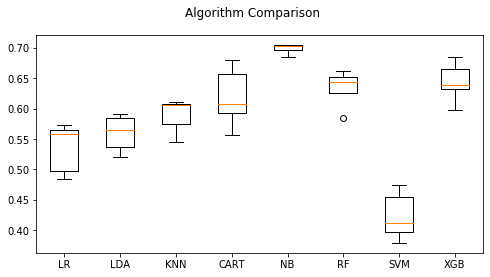

In [10]:
#boxplot results for choosing our algorithm
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

# In terms of recall the best model is :

1) LR 

2) LDA

3) KNN

4) CART

In [11]:
#precion
import warnings 
warnings.filterwarnings("ignore")# to avoid the warnings in our data-set
result1 = []
names = []
scoring = 'precision'
seed = 42

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    result1.append(cv_results)
    names.append(name)
    msg1 = (name, cv_results.mean(), cv_results.std())
    print(msg1)
#first one is mean value of a model, next one is the std deviation

('LR', 0.7268011392798275, 0.032750516325435214)
('LDA', 0.7486541368882287, 0.02858610514163447)
('KNN', 0.6840174090205458, 0.03371328864250063)
('CART', 0.585155291417623, 0.02665393640711693)
('NB', 0.5338993236844132, 0.028121415242038247)
('RF', 0.7060412656611297, 0.03424227467755743)
('SVM', 0.7460998374834993, 0.05465960502898172)
('XGB', 0.6751717418769182, 0.02703900543631838)


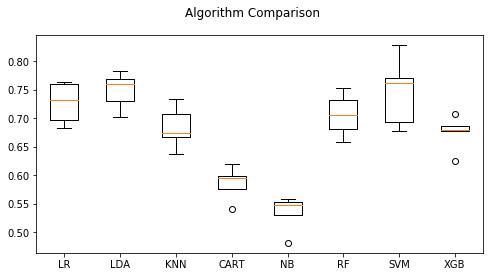

In [12]:
#boxplot results for choosing our algorithm
fig = plt.figure(figsize = (8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result1)
ax.set_xticklabels(names)
plt.show()

# In terms of precision the best model is:

1) SVM            

2) RandomForest                    

3) KNN

4) LDA              

5) Logistic Regression

In [14]:
# default scoring is a accuracy
import warnings 
warnings.filterwarnings("ignore")# to avoid the warnings in our data-set
result2 = []
names = []
seed = 42

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold)
    result2.append(cv_results)
    names.append(name)
    msg1 = (name, cv_results.mean(), cv_results.std())
    print(msg1)
#first one is mean value of a model, next one is the std deviation

('LR', 0.7653275652098588, 0.004851039777235979)
('LDA', 0.7790604888637509, 0.011476308441508766)
('KNN', 0.7598998221665111, 0.013305268235795753)
('CART', 0.7155153349537072, 0.008586190481300219)
('NB', 0.6787888978909662, 0.02014723045489811)
('RF', 0.7787384522881411, 0.008992643340013002)
('SVM', 0.7458494479009025, 0.009757704460370872)
('XGB', 0.7659696001549037, 0.011019635903773072)


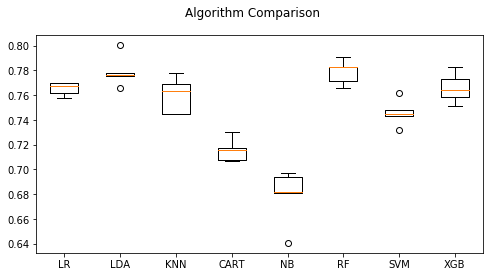

In [15]:
fig = plt.figure(figsize = (8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result2)
ax.set_xticklabels(names)
plt.show()

# Random forest is the best model in terms of accuracy, with this model do the parameter tuning and feature- engineering

# FISH DATA-SET

In [16]:
df_credit1 = pd.read_csv("C:\\Users\\BABU\\Downloads\\Fish.csv")

In [17]:
df_credit1.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [18]:
df_credit1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# LABEL ENCODING

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_credit1["Species"]=encoder.fit_transform(df_credit1['Species'])

In [20]:
df_credit1.dtypes

Species      int32
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [21]:
x = df_credit1.drop("Species", axis =1).values#independent variable

y = df_credit1["Species"].values #dependant variable
#train and test data split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

print(X_train.shape, X_test.shape)
#NOTE:
#.values will store the values in the form of array
#if you not give x will store the values in series

(119, 6) (40, 6)


In [22]:
#to feed the random state
seed = 42

#prepare models
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))
models.append(("SVM", SVC(gamma = 'auto')))
models.append(("XGB", XGBClassifier()))
#appending all the models with their names

In [29]:
import warnings 
warnings.filterwarnings("ignore")# to avoid the warnings in our data-set
result2 = []
names = []
seed = 42

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold)
    result2.append(cv_results)
    names.append(name)
    msg1 = (name, cv_results.mean(), cv_results.std())
    print(msg1)
#first one is mean value of a model, next one is the std deviation

('LR', 0.7568840579710145, 0.11211060641051428)
('LDA', 0.9579710144927537, 0.04564929827612128)
('KNN', 0.4445652173913043, 0.09407460606341192)
('CART', 0.7228260869565217, 0.09306023823045213)
('NB', 0.5369565217391304, 0.06592410968503994)
('RF', 0.7387681159420291, 0.059362821272783174)
('SVM', 0.42028985507246375, 0.07009722596513161)
('XGB', 0.7217391304347827, 0.0677022590702689)


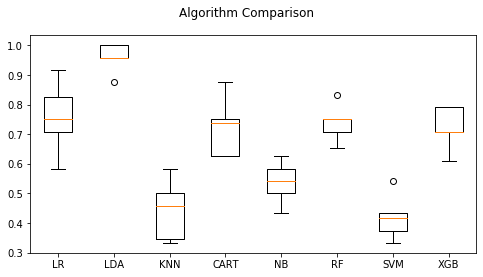

In [30]:
#boxplot results for choosing our algorithm
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result2)
ax.set_xticklabels(names)
plt.show()

# LOGISTIC REGRESSION, NAIVE BAYES IS THE BEST MODEL

# ADMIT DATA-SET


In [33]:
df_credit2 = pd.read_csv("C:\\Users\\BABU\\Desktop\\BABU-OVERALL\\DATA-SCIENCE\\exported datas\\admit.csv")

In [34]:
df_credit2

,Unnamed: 0,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,2,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


In [35]:
df_credit2.isna().sum()

Unnamed: 0     0
GRE            0
TOEFL          0
Univ_Rating    0
SOP            0
LOR            0
CGPA           0
Research       0
Admit          0
dtype: int64

In [36]:
df_credit2.drop("Unnamed: 0", axis =1, inplace = True)
df_credit2

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,2,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


In [37]:
df_credit2.dtypes

GRE              int64
TOEFL            int64
Univ_Rating      int64
SOP            float64
LOR            float64
CGPA           float64
Research         int64
Admit            int64
dtype: object

In [38]:
x = df_credit2.drop("Admit", axis =1).values#independent variable

y = df_credit2["Admit"].values #dependant variable
#train and test data split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

print(x_train.shape, x_test.shape)
#NOTE:
#.values will store the values in the form of array
#if you not give x will store the values in series

(300, 7) (100, 7)


In [39]:
#to feed the random state
seed = 42

#prepare models
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))
models.append(("SVM", SVC(gamma = 'auto')))
models.append(("XGB", XGBClassifier()))
#appending all the models with their names

In [40]:
import warnings 
warnings.filterwarnings("ignore")# to avoid the warnings in our data-set
result = []
names = []
scoring = 'recall'
seed = 42

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    result.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('LR', 0.8529609279609278, 0.09359437499641364)
('LDA', 0.8259798534798535, 0.07733206943752843)
('KNN', 0.8259783272283272, 0.03447838897909174)
('CART', 0.7380570818070817, 0.10465997098849686)
('NB', 0.8134294871794872, 0.05592909190206062)
('RF', 0.8601648351648352, 0.05333778611207076)
('SVM', 0.8437667887667889, 0.04948183487050184)
('XGB', 0.8022588522588523, 0.07090775761636488)


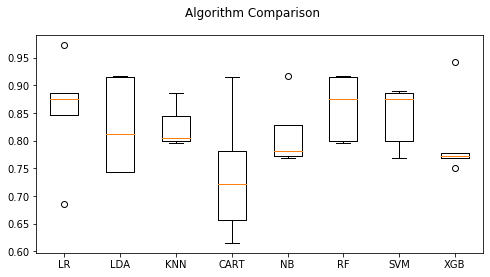

In [41]:
#boxplot results for choosing our algorithm
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

# In terms of recall the best model is Random Forest

In [42]:
import warnings 
warnings.filterwarnings("ignore")# to avoid the warnings in our data-set
result1 = []
names = []
scoring = 'precision'
seed = 42

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    result1.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('LR', 0.828976562683813, 0.0666651623979009)
('LDA', 0.8726438962681847, 0.05478890651735896)
('KNN', 0.8163539418957375, 0.031267141709547176)
('CART', 0.785652841781874, 0.06422372476237223)
('NB', 0.8934120824485117, 0.03465645709918572)
('RF', 0.8435753361899373, 0.027456471067887425)
('SVM', 0.8069245036892096, 0.0434925673081995)
('XGB', 0.8048890325360913, 0.037394478680186284)


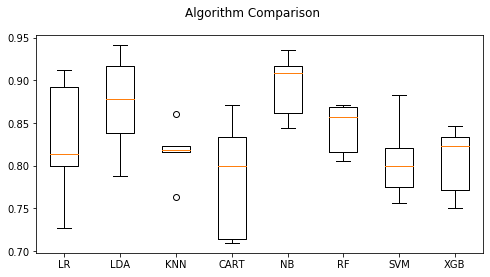

In [43]:
#boxplot results for choosing our algorithm
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result1)
ax.set_xticklabels(names)
plt.show()

# In terms of precision the best model is Random Forest, Naive bayes and Logistic Regression

In [44]:
# default scoring is a accuracy
import warnings 
warnings.filterwarnings("ignore")# to avoid the warnings in our data-set
result2 = []
names = []
seed = 42

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold)
    result2.append(cv_results)
    names.append(name)
    msg1 = (name, cv_results.mean(), cv_results.std())
    print(msg1)
#first one is mean value of a model, next one is the std deviation

('LR', 0.8100000000000002, 0.07498147919467994)
('LDA', 0.8266666666666665, 0.07195677714974301)
('KNN', 0.7866666666666667, 0.03055050463303895)
('CART', 0.7266666666666666, 0.07999999999999999)
('NB', 0.8333333333333334, 0.04346134936801767)
('RF', 0.8099999999999999, 0.03091206165165233)
('SVM', 0.7866666666666667, 0.016329931618554505)
('XGB', 0.77, 0.04988876515698591)


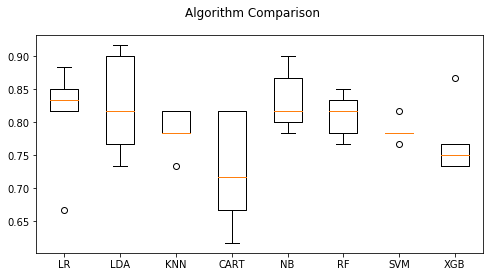

In [45]:
#boxplot results for choosing our algorithm
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result2)
ax.set_xticklabels(names)
plt.show()


# Random Forest and Naive Bayes is the best model

# IRIS DATA-SET

In [92]:
df_credit3 = pd.read_csv("C:\\Users\\BABU\\Desktop\\exported datas\\iris2.csv")

In [93]:
df_credit3.drop("Unnamed: 0",axis =1, inplace =True)

In [94]:
df_credit3.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [95]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_credit3["Species"]=encoder.fit_transform(df_credit3['Species'])

In [96]:
df_credit3.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species           int32
dtype: object

In [97]:
x = df_credit3.drop("Species", axis =1).values#independent variable

y = df_credit3["Species"].values #dependant variable
#train and test data split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

print(X_train.shape, X_test.shape)
#NOTE:
#.values will store the values in the form of array
#if you not give x will store the values in series

(112, 4) (38, 4)


In [98]:
#to feed the random state
seed = 42

#prepare models
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))
models.append(("SVM", SVC(gamma = 'auto')))
models.append(("XGB", XGBClassifier()))
#appending all the models with their names

In [99]:
import warnings 
warnings.filterwarnings("ignore")# to avoid the warnings in our data-set
result = []
names = []
scoring = 'recall'
seed = 42

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    result.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('LR', 0.8529609279609278, 0.09359437499641364)
('LDA', 0.8259798534798535, 0.07733206943752843)
('KNN', 0.8259783272283272, 0.03447838897909174)
('CART', 0.7323427960927961, 0.08236847681276595)
('NB', 0.8134294871794872, 0.05592909190206062)
('RF', 0.8493727106227107, 0.06386942756690484)
('SVM', 0.8437667887667889, 0.04948183487050184)
('XGB', 0.8022588522588523, 0.07090775761636488)


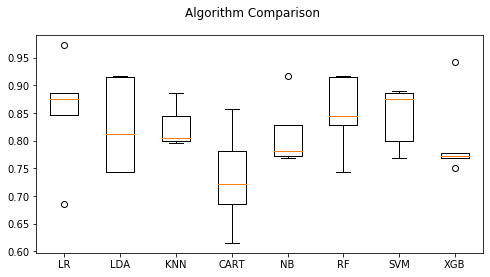

In [100]:
fig = plt.figure(figsize = (8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

In [104]:
import warnings 
warnings.filterwarnings("ignore")# to avoid the warnings in our data-set
result1 = []
names = []
scoring = 'precision'
seed = 42

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    result1.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('LR', 0.828976562683813, 0.0666651623979009)
('LDA', 0.8726438962681847, 0.05478890651735896)
('KNN', 0.8163539418957375, 0.031267141709547176)
('CART', 0.7960531309297914, 0.05446223107106504)
('NB', 0.8934120824485117, 0.03465645709918572)
('RF', 0.8354409672830727, 0.0311276432045243)
('SVM', 0.8069245036892096, 0.0434925673081995)
('XGB', 0.8048890325360913, 0.037394478680186284)


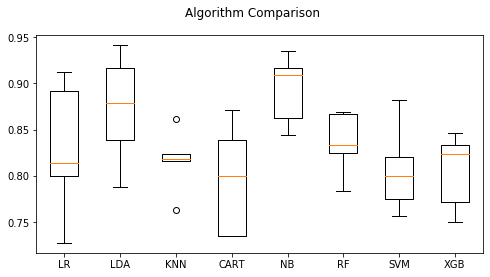

In [105]:
fig = plt.figure(figsize = (8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result1)
ax.set_xticklabels(names)
plt.show()

In [106]:
# default scoring is a accuracy
import warnings 
warnings.filterwarnings("ignore")# to avoid the warnings in our data-set
result2 = []
names = []
seed = 42

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold)
    result2.append(cv_results)
    names.append(name)
    msg1 = (name, cv_results.mean(), cv_results.std())
    print(msg1)
#first one is mean value of a model, next one is the std deviation

('LR', 0.8100000000000002, 0.07498147919467994)
('LDA', 0.8266666666666665, 0.07195677714974301)
('KNN', 0.7866666666666667, 0.03055050463303895)
('CART', 0.7466666666666667, 0.056174331821175726)
('NB', 0.8333333333333334, 0.04346134936801767)
('RF', 0.8266666666666665, 0.038873012632301994)
('SVM', 0.7866666666666667, 0.016329931618554505)
('XGB', 0.77, 0.04988876515698591)


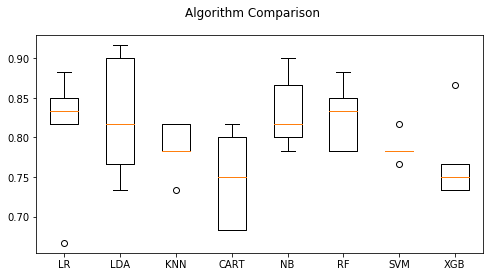

In [107]:
fig = plt.figure(figsize = (8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result2)
ax.set_xticklabels(names)
plt.show()

recall - rf, svm, lda, knn

accuracy - rf, lda, nb

precision - nb, lda, rf

# RF AND LDA IS THE BEST MODEL 